# `Python 3.7`三种距离和红移的关系图
+ $d_{comoving}$ $vs$. $z$&emsp;共动距离
+ $d_{luminosity}$ $vs$. $z$&emsp;光度距离
+ $d_{angular}$ $vs$. $z$&emsp;角直径距离

## 函数定义

In [ ]:
from scipy.integrate import quad as intg
def comoving_d(z,Omega_m,Omega_lambda,Hubble_constant):
    # simplify the variables' name
    o_m = Omega_m; o_lam = Omega_lambda; H0 = Hubble_constant
    c = 3*10**5    # speed of light (km/s)
    DH = c/H0    # Hubble distance (Mpc)
    Ez = (o_m*(1+z)**3+o_lam)**0.5
    return DH*Ez
def luminosity_d(z,Omega_m,Omega_lambda,Hubble_constant):
    # simplify the variables' name
    o_m = Omega_m; o_lam = Omega_lambda; H0 = Hubble_constant
    c = 3*10**5    # speed of light (km/s)
    DH = c/H0    # Hubble distance (Mpc)
    Ez = (o_m*(1+z)**3+o_lam)**0.5
    return DH*Ez*(1+z)
def angular_diameter_d(z,Omega_m,Omega_lambda,Hubble_constant):
    # simplify the variables' name
    o_m = Omega_m; o_lam = Omega_lambda; H0 = Hubble_constant
    c = 3*10**5    # speed of light (km/s)
    DH = c/H0    # Hubble distance (Mpc)
    Ez = (o_m*(1+z)**3+o_lam)**0.5
    return DH*Ez/(1+z)
def intg_com(redshift):
    distance, err = intg(comoving_d,0,redshift,args = (Omega_m,Omega_lambda,Hubble_constant))
    return distance
def intg_lum(redshift):
    distance, err = intg(luminosity_d,0,redshift,args = (Omega_m,Omega_lambda,Hubble_constant))
    return distance
def intg_ang(redshift):
    distance, err = intg(angular_diameter_d,0,redshift,args = (Omega_m,Omega_lambda,Hubble_constant))
    return distance

## 初稿，最初版本

In [13]:
'''
2019.10.7 by LALALA

Plot distance-redshift figure
**********************************************************
Parameters:

redshift: 1+z = 1/a
Omega_m: fraction of matter in the Universe 
Omega_lambda: fraction of dark energy in the Universe 
**********************************************************
Returns:

distance vs. redshift figure
'''
# use Romberg's method!!!
# 使用龙贝格积分算法
from scipy.integrate import romberg as intg
###############################################################
# comoving distance hasn't been integrated
def comoving_d(z,Omega_m,Omega_lambda):
    # simplify the variables' name
    o_m = Omega_m; o_lam = Omega_lambda;
    Ez = (o_m*(1+z)**3+o_lam)**0.5
    com_dis = 1/Ez
    return com_dis
################################################################
# comoving distance
def intg_com(redshift):
    dist = intg(comoving_d,0,redshift,args = (Omega_m,Omega_lambda))
    return dist
# luminosity distance
def intg_lum(redshift):
    dist = intg_com(redshift)*(1.+redshift)
    return dist
# angular diameter distance
def intg_ang(redshift):
    dist = intg_com(redshift)/(1.+redshift)
    return dist
#################################################################
# plot distance vs. redshift
def dis_z_plt(Omega_m,Omega_lambda):
    import numpy as np, matplotlib.pyplot as plt
    plt.figure(figsize=(8, 5))
    # prepare the value of x-axis and y-axis
    x = np.linspace(0,10,300)
    y1 = np.array(list(map(intg_com,x)))
    y2 = np.array(list(map(intg_lum,x)))
    y3 = np.array(list(map(intg_ang,x)))
    # plot!!!
    plt.loglog(x, y2, 'r-.',label="$d_L$")
    plt.loglog(x, y1, 'g--',label="$\chi$")
    plt.loglog(x, y3, 'y-',label="$d_A$")
    # add some details
    plt.title("$\Omega_m=%0.2f,\Omega_\Lambda=%0.2f$"%(Omega_m,Omega_lambda), fontsize=20)
    plt.xlabel("$z$", fontsize=20)
    plt.ylabel("Distance ($1/H_0$)", fontsize=20)
    plt.xlim(0.06,10)
    plt.ylim(0.06,20)
    plt.xticks([0.1,1,10],('0.1','1','10'), fontsize=13)
    plt.yticks([0.1,1,10],('0.1','1','10'), fontsize=13)
    plt.tick_params(which='both',direction='in')
    plt.legend(loc='best', fontsize=13)
    plt.show()
    return

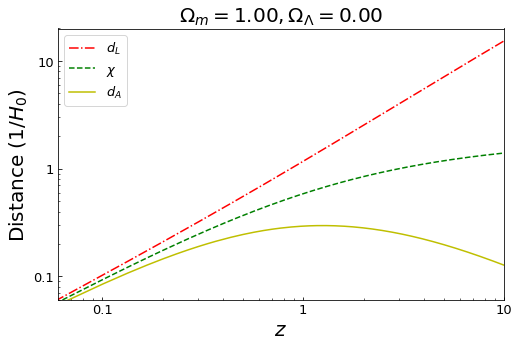

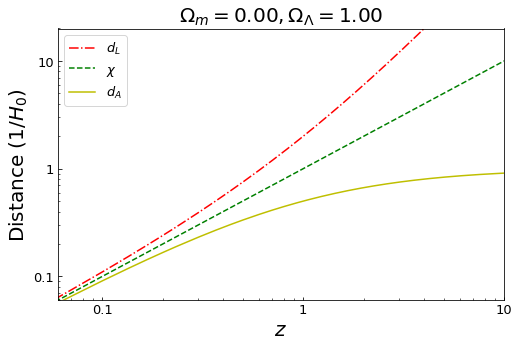

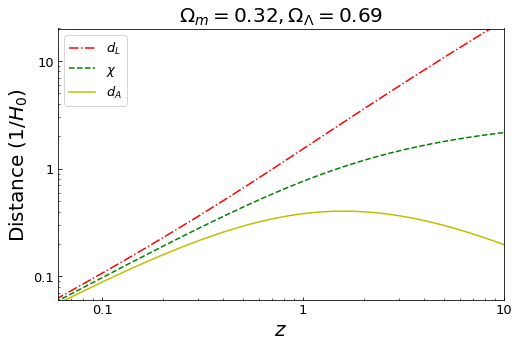

In [14]:
# Omega_matter = 1, Omega_lambda = 0
Omega_m = 1
Omega_lambda = 0
dis_z_plt(Omega_m = Omega_m, Omega_lambda = Omega_lambda)
# Omega_matter = 0.315, Omega_lambda = 0.685
# Preference: 
# Aghanim, N., Akrami, Y., Ashdown, M., Aumont, J., Baccigalupi, C., Ballardini, M., ... & Battye, R. (2018). Planck 2018 results. VI. Cosmological parameters. arXiv preprint arXiv:1807.06209.
Omega_m = 0.315
Omega_lambda = 0.685
dis_z_plt(Omega_m = Omega_m, Omega_lambda = Omega_lambda)
# Omega_matter = 0, Omega_lambda = 1
Omega_m = 0
Omega_lambda = 1
dis_z_plt(Omega_m = Omega_m, Omega_lambda = Omega_lambda)

In [4]:
dis_z_plt(Omega_m=0.3,Omega_lambda=0.7)

NameError: name 'Omega_m' is not defined

<Figure size 576x360 with 0 Axes>

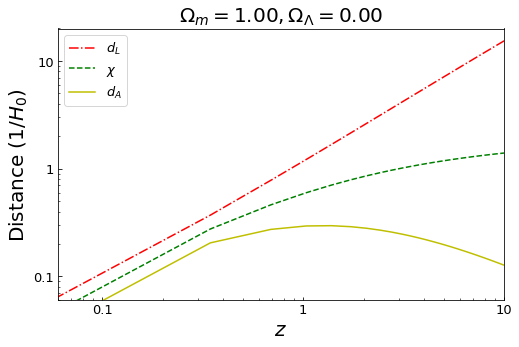

In [9]:
Omega_m = 1
Omega_lambda = 0
dis_z_plt(Omega_m = Omega_m, Omega_lambda = Omega_lambda)

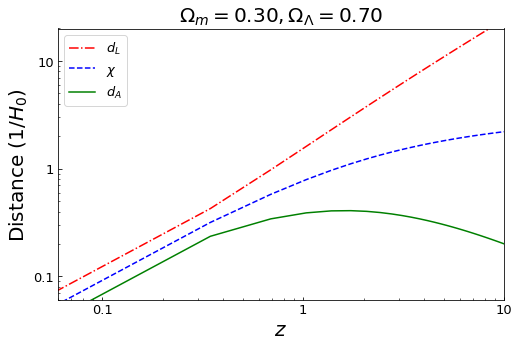

In [122]:
import numpy as np, matplotlib.pyplot as plt
# value of parameter
Omega_m=0.3
Omega_lambda=0.7
Hubble_constant=73.5
plt.figure(figsize=(8, 5))
# prepare the value of x-axis and y-axis
x = np.linspace(0,10,30)
y1 = np.array(list(map(intg_com,x)))*Hubble_constant
y2 = np.array(list(map(intg_lum,x)))*Hubble_constant
y3 = np.array(list(map(intg_ang,x)))*Hubble_constant
# plot!!!
plt.loglog(x, y2, 'r-.',label="$d_L$")
plt.loglog(x, y1, 'b--',label="$\chi$")
plt.loglog(x, y3, 'g-',label="$d_A$")

# Omega_m=1.
# Omega_lambda=0.
# Hubble_constant=73.5
# # prepare the value of x-axis and y-axis
# x = np.linspace(0,10,30)
# y1 = np.array(list(map(intg_com,x)))*Hubble_constant
# y2 = np.array(list(map(intg_lum,x)))*Hubble_constant
# y3 = np.array(list(map(intg_ang,x)))*Hubble_constant
# # plot!!!
# plt.loglog(x, y2, 'r-.',label="$d_L$2")
# plt.loglog(x, y1, 'b--',label="$\chi$2")
# plt.loglog(x, y3, 'g-',label="$d_A$2")


# add some details
plt.title("$\Omega_m=%0.2f,\Omega_\Lambda=%0.2f$"%(Omega_m,Omega_lambda), fontsize=20)
plt.xlabel("$z$", fontsize=20)
plt.ylabel("Distance ($1/H_0$)", fontsize=20)
plt.xlim(0.06,10)
plt.ylim(0.06,20)
plt.xticks([0.1,1,10],('0.1','1','10'), fontsize=13)
plt.yticks([0.1,1,10],('0.1','1','10'), fontsize=13)
plt.tick_params(which='both',direction='in')
plt.legend(loc='best', fontsize=13)
plt.show()

## 作业成品

In [15]:
'''
2019.10.7 by LALALA

Plot distance-redshift figure
**********************************************************
Parameters:

redshift: 1+z = 1/a
Omega_m: fraction of matter in the Universe 
Omega_lambda: fraction of dark energy in the Universe 
**********************************************************
Returns:

distance vs. redshift figure
'''
# use Romberg's method!!!
# 使用龙贝格积分算法
from scipy.integrate import romberg as intg
###############################################################
# comoving distance hasn't been integrated
def comoving_d(z,Omega_m,Omega_lambda):
    # simplify the variables' name
    o_m = Omega_m; o_lam = Omega_lambda;
    Ez = (o_m*(1+z)**3+o_lam)**0.5
    com_dis = 1/Ez
    return com_dis
################################################################
# comoving distance
def intg_com(redshift):
    dist = intg(comoving_d,0,redshift,args = (Omega_m,Omega_lambda))
    return dist
# luminosity distance
def intg_lum(redshift):
    dist = intg_com(redshift)*(1.+redshift)
    return dist
# angular diameter distance
def intg_ang(redshift):
    dist = intg_com(redshift)/(1.+redshift)
    return dist
#################################################################
# plot distance vs. redshift
def dis_z_plt(Omega_m,Omega_lambda):
    import numpy as np, matplotlib.pyplot as plt
    plt.figure(figsize=(8, 5))
    # prepare the value of x-axis and y-axis
    x = np.linspace(0,10,300)
    y1 = np.array(list(map(intg_com,x)))
    y2 = np.array(list(map(intg_lum,x)))
    y3 = np.array(list(map(intg_ang,x)))
    # plot!!!
    plt.loglog(x, y2, 'r-.',label="$d_L$")
    plt.loglog(x, y1, 'g--',label="$\chi$")
    plt.loglog(x, y3, 'y-',label="$d_A$")
    # add some details
    plt.title("$\Omega_m=%0.2f,\Omega_\Lambda=%0.2f$"%(Omega_m,Omega_lambda), fontsize=20)
    plt.xlabel("$z$", fontsize=20)
    plt.ylabel("Distance ($1/H_0$)", fontsize=20)
    plt.xlim(0.06,10)
    plt.ylim(0.06,20)
    plt.xticks([0.1,1,10],('0.1','1','10'), fontsize=13)
    plt.yticks([0.1,1,10],('0.1','1','10'), fontsize=13)
    plt.tick_params(which='both',direction='in')
    plt.legend(loc='best', fontsize=13)
    plt.show()
    return

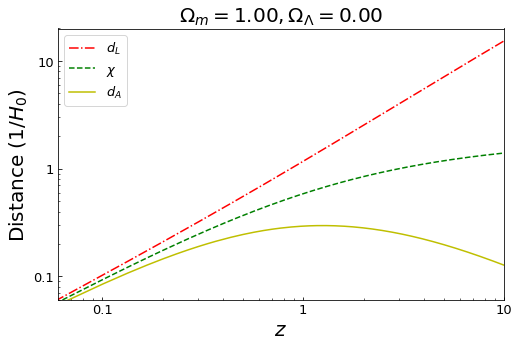

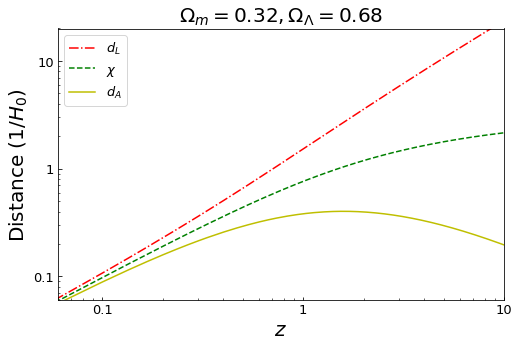

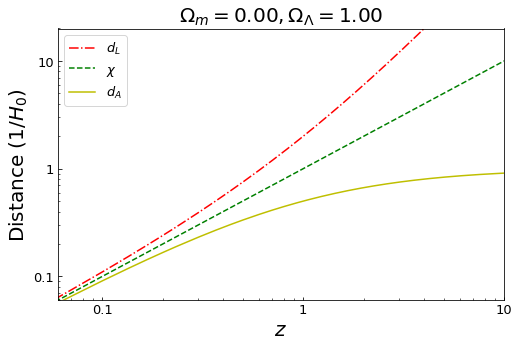

In [16]:
# Omega_matter = 1, Omega_lambda = 0
Omega_m = 1
Omega_lambda = 0
dis_z_plt(Omega_m = Omega_m, Omega_lambda = Omega_lambda)
# Omega_matter = 0.315, Omega_lambda = 0.685
# Preference: 
# Aghanim, N., Akrami, Y., Ashdown, M., Aumont, J., Baccigalupi, C., Ballardini, M., ... & Battye, R. (2018). Planck 2018 results. VI. Cosmological parameters. arXiv preprint arXiv:1807.06209.
Omega_m = 0.32
Omega_lambda = 0.68
dis_z_plt(Omega_m = Omega_m, Omega_lambda = Omega_lambda)
# Omega_matter = 0, Omega_lambda = 1
Omega_m = 0
Omega_lambda = 1
dis_z_plt(Omega_m = Omega_m, Omega_lambda = Omega_lambda)

***

# ` Python 2.7 `Recfast计算再结合的电离度和物质温度与红移的关系
$X_e$ vs. z, $T_{matter}$ vs. $z$   
Recfast的Python版本：[recfast4py文档](https://cosmo-docs.phys.ethz.ch/recfast4py/index.html)&emsp;
[源代码](https://pypi.org/project/recfast4py/#files)   
***完成日期：2019.10.15***

要求   
>+ 使用recfast，计算得到红移和电子电离度的关系
+ 推导出 红移和温度（辐射和重子物质）的关系
+ 作图：电离度分别和红移、辐射和重子物质温度的关系图
***
## 初步尝试作图

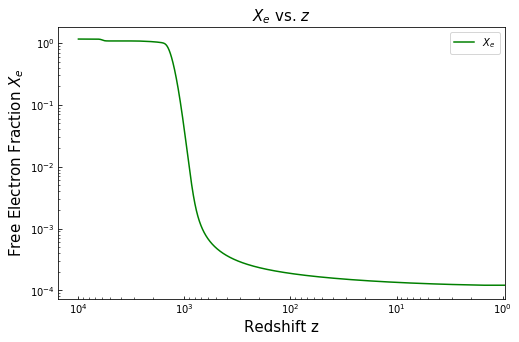

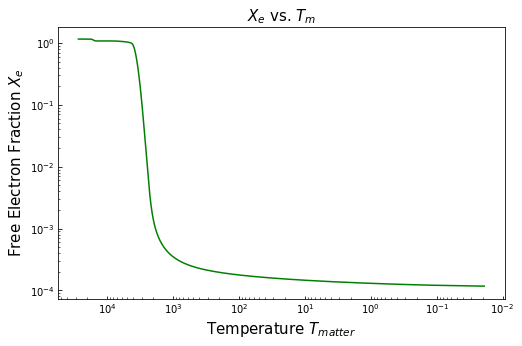

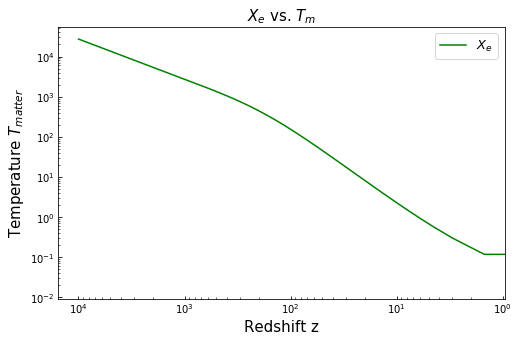

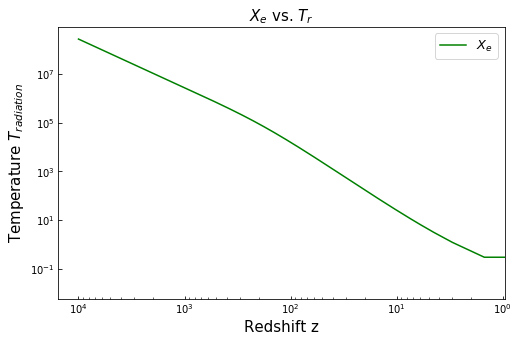

In [2]:
from recfast4py import recfast
import numpy as np
import matplotlib.pyplot as plt

Yp = 0.24    # helium mass fraction 
T0 = 2.725    # Temperature of CMB at z=0

Om = 0.268    # matter
Ob = 0.06#0.049    # Baryons
OL = 0.68    # Lambda
Ok = 0.0    # Curvature
h100 = 0.72    # Hubble constant  h100=H0/100
Nnu = 3.04    # effective number of neutrinos
F = 0    # fudge-factor
fDM = 0.0

zarr, Xe_H, Xe_He, Xe ,TM = recfast.Xe_frac(Yp,T0,Om, Ob, OL,Ok, h100, Nnu, F, fDM, switch=0, npz=3000, zstart=10000, zend=0)

zarr = np.array(zarr)
Xe_H = np.array(Xe_H)
Xe_He = np.array(Xe_He)
Xe = np.array(Xe)
TM = np.array(TM)

plt.figure(figsize=(8, 5))
plt.plot(zarr,Xe,'g',label='$X_e$')
plt.yscale('log')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.tick_params(which='both',direction='in')
plt.legend(loc='best')
plt.title("$X_e$ vs. $z$",fontsize=15)
plt.xlabel("Redshift z",fontsize=15)
plt.ylabel("Free Electron Fraction $X_e$",fontsize=15)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(TM,Xe,'g',label='$X_e$')
plt.title("$X_e$ vs. $T_m$",fontsize=15)
plt.xlabel("Temperature $T_{matter}$",fontsize=15)
plt.ylabel("Free Electron Fraction $X_e$",fontsize=15)
plt.yscale('log')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.tick_params(which='both',direction='in')
plt.show()

plt.figure(figsize=(8, 5))
# plt.plot(TM*(1+zarr),Xe,'g',label='$X_e$')
plt.plot(zarr,TM,'g',label='$X_e$')
plt.title("$X_e$ vs. $T_m$",fontsize=15)
plt.ylabel("Temperature $T_{matter}$",fontsize=15)
plt.xlabel("Redshift z",fontsize=15)
plt.legend(loc='best', fontsize=13)
plt.yscale('log')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.tick_params(which='both',direction='in')
plt.show()

plt.figure(figsize=(8, 5))
# plt.plot(TM*(1+zarr),Xe,'g',label='$X_e$')
plt.plot(zarr,TM*(1+zarr),'g',label='$X_e$')
# plt.xticks([1e-1,1e1,1e3,1e5,1e7],('$10^{-1}$','$10^{1}$','$10^{3}$','$10^{5}$','$10^{7}$'), fontsize=13)
# plt.yticks([0.001,0.01,0.1,1],('$10^{-3}$','$10^{-2}$','$10^{-1}$','1'), fontsize=13)
plt.title("$X_e$ vs. $T_r$",fontsize=15)
plt.ylabel("Temperature $T_{radiation}$",fontsize=15)
plt.xlabel("Redshift z",fontsize=15)
plt.legend(loc='best', fontsize=13)
plt.yscale('log')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.tick_params(which='both',direction='in')
plt.show()

***
### 实现双重坐标 twiny() 以及 对数刻度 xscale('log')
**重要函数**
> 对数坐标：  
>>+ `plt.xscale('log')`&emsp;&emsp;# x轴改为对数坐标，并有刻度     
>>+ `plt.loglog()`&emsp;&emsp;# 直接画图为log图

> 翻转坐标轴【反转坐标轴】   
>>+ `plt.gca().invert_xaxis()`&emsp;&emsp;# 反转x坐标轴 
>>+ `plt.xlim(100,0)`&emsp;&emsp;# 直接将坐标轴范围颠倒

> 双坐标轴，共用一个坐标轴
>>+ `plt.twiny()`&emsp;&emsp;# 共用一个y轴，上下两个x轴

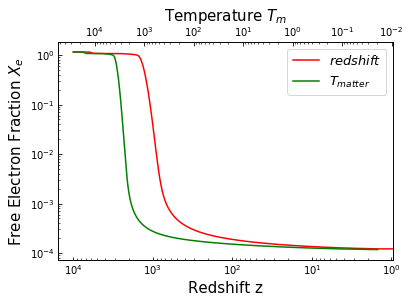

In [3]:


# plt.figure(figsize=(8, 5))
ax1, = plt.plot(zarr,Xe,'r',label='$redshift$')
plt.yscale('log')
plt.xscale('log')
plt.tick_params(which='both',direction='in')
plt.gca().invert_xaxis()
plt.xlabel("Redshift z",fontsize=15)
plt.ylabel("Free Electron Fraction $X_e$",fontsize=15)
# plt.legend(loc='best', fontsize=13)
# plt.show()
plt.twiny()
# ax2, = plt.plot((TM/2.725-1)/(10**4*1.6/1.38),Xe,'g',label='$T_{matter}$')
ax2, = plt.plot(TM,Xe,'g',label='$T_{matter}$')
plt.xscale('log')
plt.tick_params(which='both',direction='in')
plt.gca().invert_xaxis()
plt.legend(handles = [ax1,ax2],loc='best', fontsize=13)

plt.xlabel("Temperature $T_m$",fontsize=15)
plt.show()

***
### $T_m$不是简单的$T_m=T_{cmb}*(1+z)$
+ 返回值TM就是$T_m$   
+ 先给一个初值，然后求解微分方程得到真正的$T_{matter}$   
+ 以下是TM与$T_{cmb}(1+z)$对比图

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from recfast4py import recfast
# Recfast: compute 
Yp = 0.24    # ???
T0 = 2.725    # Temperature of CMB at z=0

Om = 0.268    # matter
Ob = 0.06#0.049    # Baryons
OL = 0.68    # Lambda
Ok = 0.0    # Curvature
h100 = 0.72    # Hubble constant  h100=H0/100
Nnu = 3.04    # effective number of neutrinos
F = 0    # fudge-factor
fDM = 0.0

zarr, Xe_H, Xe_He, Xe ,TM = recfast.Xe_frac(Yp,T0,Om, Ob, OL,Ok, h100, Nnu, F, fDM, switch=1, npz=5000, zstart=10000, zend=0)
zarr = np.array(zarr)
Xe = np.array(Xe)
TM = np.array(TM)

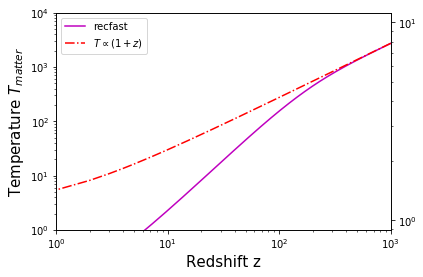

In [5]:
# Plot
# plt.scatter(zarr,TM,marker = 'x', color = 'm', label='recfast', s = 10)
plt.plot(zarr,TM,'m-', label='recfast')
# plt.plot(zarr,(1+zarr)*2.725,color='red', label='$T\propto(1+z)$')
a=np.linspace(0,2000,2000)
# plt.scatter(a,(1+a)*2.725,color='red', marker = 'x',label='$T\propto(1+z)$')
plt.plot(a,(1+a)*2.725,color='red', linestyle='-.',label='$T\propto(1+z)$')# marker = '.',
# plt.loglog(a,a+10,color='red', linestyle='-',label='$T\propto(1+z)$')# marker = '.',
# plt.gca().invert_xaxis()
plt.yscale('log')
plt.xscale('log')

plt.xlim(1,1000)
plt.ylim(1,10000)
plt.xlabel("Redshift z",fontsize=15)
plt.ylabel("Temperature $T_{matter}$",fontsize=15)
plt.legend(loc='best')
plt.twinx()
# plt.ylim(1,10000)
plt.yscale('log')
plt.show()

## 导出数据 ($z,Xe_H,Xe_{He},Xe,T_{matter}$) [pandas结构]

In [6]:
import numpy as np    # 数组操作
import pandas as pd    # numpy加强版
from recfast4py import recfast

# 参数设定
Yp = 0.24    # ???
T0 = 2.725    # Temperature of CMB at z=0
Om = 0.268    # matter
Ob = 0.06#0.049    # Baryons
OL = 0.68    # Lambda
Ok = 0.0    # Curvature
h100 = 0.72    # Hubble constant  h100=H0/100
Nnu = 3.04    # effective number of neutrinos
F = 0    # fudge-factor
fDM = 0.0
# 使用 recfast
zarr, Xe_H, Xe_He, Xe ,TM = recfast.Xe_frac(Yp,T0,Om, Ob, OL,Ok, h100, Nnu, F, fDM, switch=1, npz=6666, zstart=10000, zend=0)
# 将结果转为 numpy
zarr = np.array(zarr)
Xe_H = np.array(Xe_H)
Xe_He = np.array(Xe_He)
Xe = np.array(Xe)
TM = np.array(TM)
# 构造字典
data = {'redshift':zarr,
        'Xe_H':Xe_H,
        'Xe_He':Xe_He,
       'Xe':Xe,
       'T_matter':TM}
# 转换为 pandas 数组
df = pd.DataFrame(data,columns=['redshift','Xe_H','Xe_He','Xe','T_matter'])
# 打印检查
print(df)

# 导出文件
# df.to_csv('recfast_z_XeH_XeHe_Xe_Tm.csv',index=1,header=1)# 保存行名，列名

          redshift      Xe_H         Xe_He        Xe      T_matter
0     10000.000000  1.000000  7.951339e-02  1.159027  27252.725000
1      9990.000000  1.000000  7.951339e-02  1.159027  27225.475000
2      9980.000000  1.000000  7.951339e-02  1.159027  27198.225000
3      9970.000000  1.000000  7.951339e-02  1.159027  27170.975000
4      9960.000000  1.000000  7.951339e-02  1.159027  27143.725000
5      9950.000000  1.000000  7.951339e-02  1.159027  27116.475000
6      9940.000000  1.000000  7.951339e-02  1.159027  27089.225000
7      9930.000000  1.000000  7.951339e-02  1.159027  27061.975000
8      9920.000000  1.000000  7.951339e-02  1.159027  27034.725000
9      9910.000000  1.000000  7.951339e-02  1.159027  27007.475000
10     9900.000000  1.000000  7.951339e-02  1.159027  26980.225000
11     9890.000000  1.000000  7.951339e-02  1.159027  26952.975000
12     9880.000000  1.000000  7.951339e-02  1.159027  26925.725000
13     9870.000000  1.000000  7.951339e-02  1.159027  26898.47

## 最终版本
***
### 普通版本【未定义函数】

In [7]:
from recfast4py import recfast
import numpy as np
import matplotlib.pyplot as plt

Yp = 0.24    # ???
T0 = 2.725    # Temperature of CMB at z=0

Om = 1#0.268    # matter
Ob = 0.06#0.049    # Baryons
OL = 0.68    # Lambda
Ok = 0.0    # Curvature
h100 = 0.72    # Hubble constant  h100=H0/100
Nnu = 3.04    # effective number of neutrinos
F = 1.14    # fudge-factor
fDM = 0.0    # fDM [eV/s] which gives annihilation efficiency

zarr, Xe_H, Xe_He, Xe ,TM = recfast.Xe_frac(Yp,T0,Om, Ob, OL,Ok, h100, Nnu, F, fDM, switch=1, npz=3000, zstart=10000, zend=0.)

zarr = np.array(zarr)
Xe_H = np.array(Xe_H)
Xe_He = np.array(Xe_He)
Xe = np.array(Xe)
TM = np.array(TM)

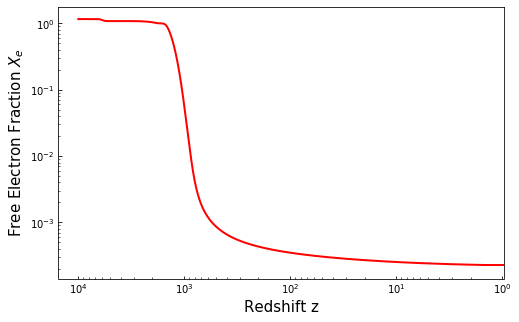

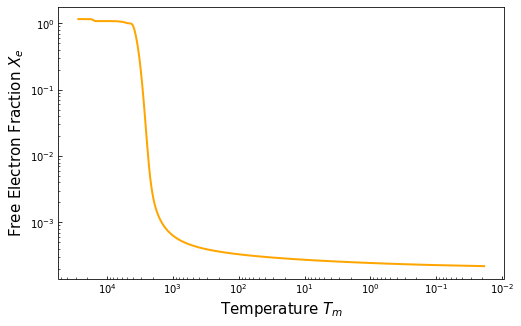

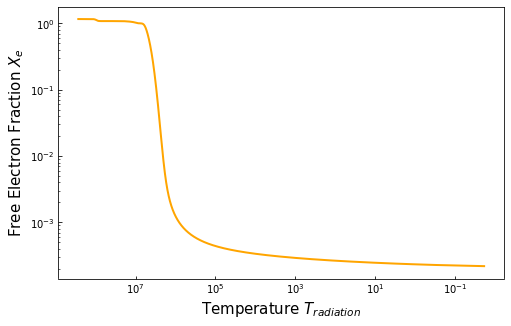

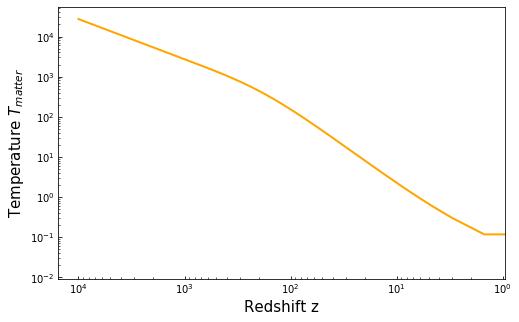

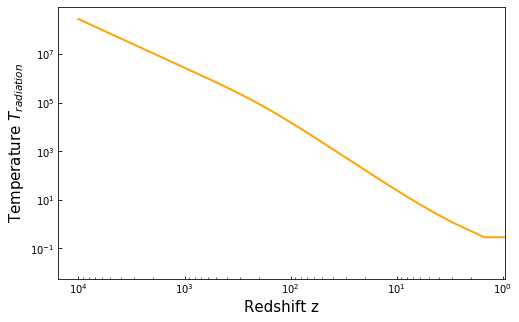

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(zarr,Xe,'r-',linewidth=2,label='$X_e$')
# plt.plot(zarr,Xe_H,'g-.',linewidth=2,label='$X_H$')
# plt.xlim(3000,6000)
# plt.ylim(0.8,1.2)
# plt.plot(zarr,Xe_H/(1+Xe_H),'g-.',linewidth=2,label='$X_H$')
# plt.plot(zarr,Xe_He,'y--',linewidth=2,label='$X_{He}$')
# 详细调整
plt.yscale('log')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.tick_params(which='both',direction='in')
# plt.legend(loc='best')
# plt.title("$X_e$ vs. $z$",fontsize=15)
plt.xlabel("Redshift z",fontsize=15)
plt.ylabel("Free Electron Fraction $X_e$",fontsize=15)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(TM,Xe,linestyle='-',color='orange',linewidth=2,label='$X_e$')
# plt.plot(zarr,Xe_H,'g-.',linewidth=2,label='$X_H$')
# plt.xlim(3000,6000)
# plt.ylim(0.8,1.2)
# plt.plot(zarr,Xe_H/(1+Xe_H),'g-.',linewidth=2,label='$X_H$')
# plt.plot(zarr,Xe_He,'y--',linewidth=2,label='$X_{He}$')
# 详细调整
plt.yscale('log')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.tick_params(which='both',direction='in')
# plt.legend(loc='best')
# plt.title("$X_e$ vs. $z$",fontsize=15)
plt.xlabel("Temperature $T_m$",fontsize=15)
plt.ylabel("Free Electron Fraction $X_e$",fontsize=15)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(TM*(1+zarr),Xe,linestyle='-',color='orange',linewidth=2,label='$X_e$')
# plt.plot(zarr,Xe_H,'g-.',linewidth=2,label='$X_H$')
# plt.xlim(3000,6000)
# plt.ylim(0.8,1.2)
# plt.plot(zarr,Xe_H/(1+Xe_H),'g-.',linewidth=2,label='$X_H$')
# plt.plot(zarr,Xe_He,'y--',linewidth=2,label='$X_{He}$')
# 详细调整
plt.yscale('log')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.tick_params(which='both',direction='in')
# plt.legend(loc='best')
# plt.title("$X_e$ vs. $z$",fontsize=15)
plt.xlabel("Temperature $T_{radiation}$",fontsize=15)
plt.ylabel("Free Electron Fraction $X_e$",fontsize=15)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(zarr,TM,linestyle='-',color='orange',linewidth=2,label='$X_e$')
# plt.plot(zarr,Xe_H,'g-.',linewidth=2,label='$X_H$')
# plt.xlim(3000,6000)
# plt.ylim(0.8,1.2)
# plt.plot(zarr,Xe_H/(1+Xe_H),'g-.',linewidth=2,label='$X_H$')
# plt.plot(zarr,Xe_He,'y--',linewidth=2,label='$X_{He}$')
# 详细调整
plt.yscale('log')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.tick_params(which='both',direction='in')
# plt.legend(loc='best')
# plt.title("$X_e$ vs. $z$",fontsize=15)
plt.xlabel("Redshift z",fontsize=15)
plt.ylabel("Temperature $T_{matter}$",fontsize=15)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(zarr,TM*(1+zarr),linestyle='-',color='orange',linewidth=2,label='$X_e$')
# plt.plot(zarr,Xe_H,'g-.',linewidth=2,label='$X_H$')
# plt.xlim(3000,6000)
# plt.ylim(0.8,1.2)
# plt.plot(zarr,Xe_H/(1+Xe_H),'g-.',linewidth=2,label='$X_H$')
# plt.plot(zarr,Xe_He,'y--',linewidth=2,label='$X_{He}$')
# 详细调整
plt.yscale('log')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.tick_params(which='both',direction='in')
# plt.legend(loc='best')
# plt.title("$X_e$ vs. $z$",fontsize=15)
plt.xlabel("Redshift z",fontsize=15)
plt.ylabel("Temperature $T_{radiation}$",fontsize=15)
plt.show()

# # 导出图片【矢量图】
# plt.savefig(fname="./tmp_storage/lalala",format="eps")

#### $X_e$ vs. $z$
由于我们在画log图时，靠近0处会有明显的曲率变化
> 例如：y=x+1，在普通坐标系下和log图中，有明显不同。在靠近0时，变得非常平缓   
>> 基于此，如果我们想要查看0~1范围内详细情况（放大0~1区间），可以画成 log(x+1)图，如果想要放大 (0,2) 区间，那就画 log(x+2) 图   

所以我们只将红移下限设定到1

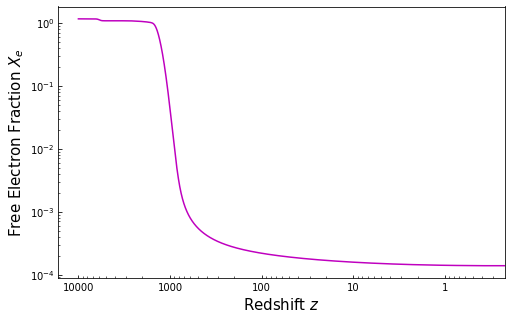

In [9]:
from recfast4py import recfast
import numpy as np
import matplotlib.pyplot as plt

Yp = 0.24    # helium mass fraction 
T0 = 2.725    # Temperature of CMB at z=0

Om = 0.268    # matter
Ob = 0.052#0.049    # Baryons
OL = 0.68    # Lambda
Ok = 0.0    # Curvature
h100 = 0.72    # Hubble constant  h100=H0/100
Nnu = 3.04    # effective number of neutrinos
F = 0    # fudge-factor
fDM = 0.0

zarr, Xe_H, Xe_He, Xe ,TM = recfast.Xe_frac(Yp,T0,Om, Ob, OL,Ok, h100, Nnu, F, fDM, 
                                            switch=0, npz=10000, zstart=10000, zend=0)

zarr = np.array(zarr)
Xe_H = np.array(Xe_H)
Xe_He = np.array(Xe_He)
Xe = np.array(Xe)
TM = np.array(TM)
################################################################
plt.figure(figsize=(8, 5))
plt.plot(zarr,Xe,'m-',label='$redshift$')
plt.yscale('log')
plt.xscale('log')
plt.tick_params(which='both',direction='in')
plt.gca().invert_xaxis()
# plt.title("recfast")
plt.xlabel("Redshift $z$",fontsize=15)
plt.ylabel("Free Electron Fraction $X_e$",fontsize=15)
# plt.xticks([1,10,100,1000],('1','10','100','1000'))#, fontsize=13)
plt.xticks([1,10,100,1000,10000],('1','10','100','1000','10000'))#, fontsize=13)
# 导出图片【矢量图】
plt.savefig(fname="./tmp_storage/recfast_Xe_z.eps",format="eps")

plt.show()

#### $T_{m}$ vs. $z$ 
+ `辐射温度就是指CMB的温度，而CMB的温度是随着时间逐渐降低的，和红移呈完美的线性关系：`$T_{cmb}=T_0*(1+z),T_0=2.7K$ `应该是由于早期宇宙，在红移1000时脱耦，光子和光子之间的相互作用时间超过哈勃时间，那么可以认为其脱耦之后再也没有相互作用，也就是理想的独立状态，所以只需要考虑红移对其影响`
+ `物质温度其实就是指电子温度，因为我们可以将电子和质子一起看做是等离子气体，因为宇宙中的大部分重子物质都是电离形式，所以可以近似地认为，电子物质其实就是重子物质，电子和质子是达到了热平衡`
+ $T_{cmb}\propto(1+z)$和$T_{matter}\propto(1+z)^2$通过求解测地线方程可以得到。或者可以近似地认为【既然光子的能量$E\propto p$，物质能量$E=3/2kT=p^2/2m\propto p^2$，所以可以得到；$T_{cmb}\propto(1+z)$; $T_{matter}\propto(1+z)^2$】 

$T_m=T_{\gamma}=T_e$
> 在recfast中，物质温度(matter temperature)和辐射温度(radiation temperature)是相同的
>> 根据论文[(Jens Chluba et al. 2015)](https://arxiv.org/abs/1503.04827)
可以知道，recfast事实上在计算时，认为这几个温度是相同的，从而造成了一定的误差。

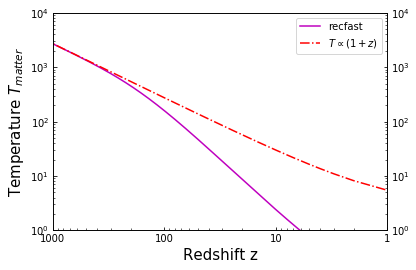

In [10]:
# Plot
# fig, ax = plt.subplots(figsize=(8, 3))
plt.plot(zarr,TM,'m-', label='recfast')
a=np.linspace(0,2000,2000)
plt.plot(a,(1+a)*2.725,color='red', linestyle='-.',label='$T\propto(1+z)$')# marker = '.',
plt.xticks([1,10,100,1000],('1','10','100','1000'))
plt.yticks([1,10,100,1000,10000],('1','10','100','1000','10000'))
plt.tick_params(which='both',direction='in')
plt.yscale('log')
plt.xscale('log')

plt.xlim(1,1000)
plt.ylim(1,10000)
plt.xlabel("Redshift z",fontsize=15)
plt.ylabel("Temperature $T_{matter}$",fontsize=15)
plt.legend(loc='best')
plt.twinx()
plt.xticks([1,10,100,1000],('1','10','100','1000'))#, fontsize=13)
plt.yticks([1,10,100,1000,10000],('1','10','100','1000','10000'))#, fontsize=13)
plt.gca().invert_xaxis()
plt.tick_params(which='both',direction='in')
plt.ylim(1,10000)
plt.yscale('log')

# 导出图片【矢量图】
# plt.savefig(fname="./tmp_storage/recfast_Tm_z.eps",format="eps")

plt.show()

### 函数版本【方便使用和迁移使用，模块化】